In [7]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate 4 random features
X1 = np.random.rand(n) * 10   # Feature 1
X2 = np.random.rand(n) * 20   # Feature 2
#X3 = np.random.rand(n) * 5    # Feature 3
#X4 = np.random.rand(n) * 50   # Feature 4

# True coefficients
beta = [2.5, -1.2, 3.8, 0.5]

# Add Gaussian noise
noise = np.random.randn(n) * 10

# Target variable
y = beta[0] * X1 + beta[1] * X2 + noise

# Create DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    #'X3': X3,
    #'X4': X4,
    'y': y
})

In [8]:
df

,X1,X2,y
0,3.745401,3.702659,-3.859513
1,9.507143,10.838019,2.493431
2,7.319939,17.458917,-4.915640
3,5.986585,14.644498,1.066720
4,1.560186,16.131223,-6.321155
...,...,...,...
995,0.915821,13.139103,-19.125112
996,9.173136,19.132292,10.187921
997,1.368186,1.379160,22.649901
998,9.502374,1.141094,6.526787


In [14]:
df.to_csv("linear_data.csv", index=False)

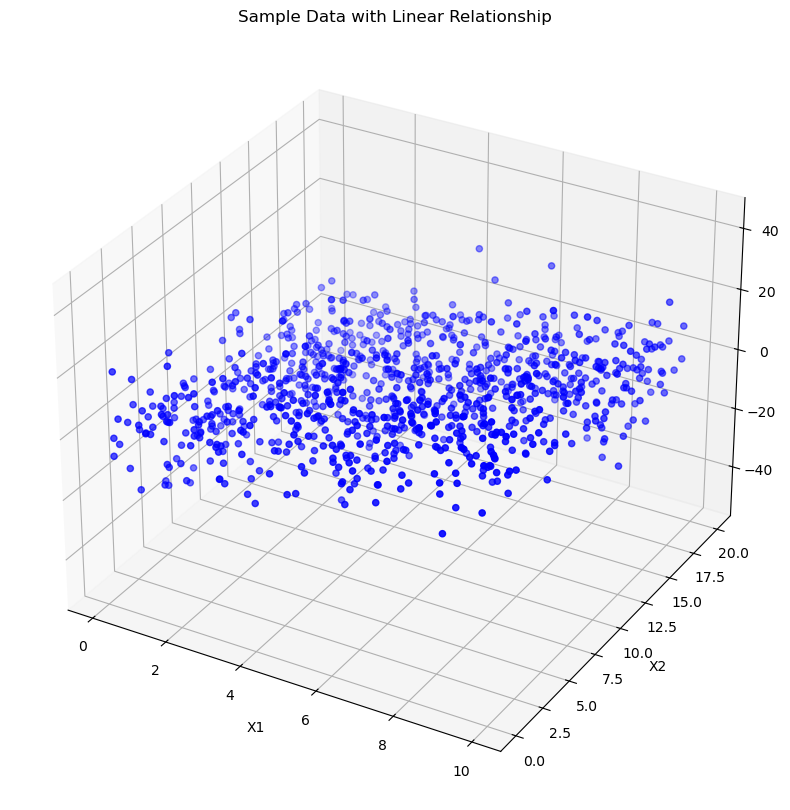

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('linear_data.csv')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['y'], c='b', marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Sample Data with Linear Relationship')

plt.show()

Optimal betas (no intercept): beta1 = 2.492249, beta2 = -1.188092
Optimal MSE: 95.586482


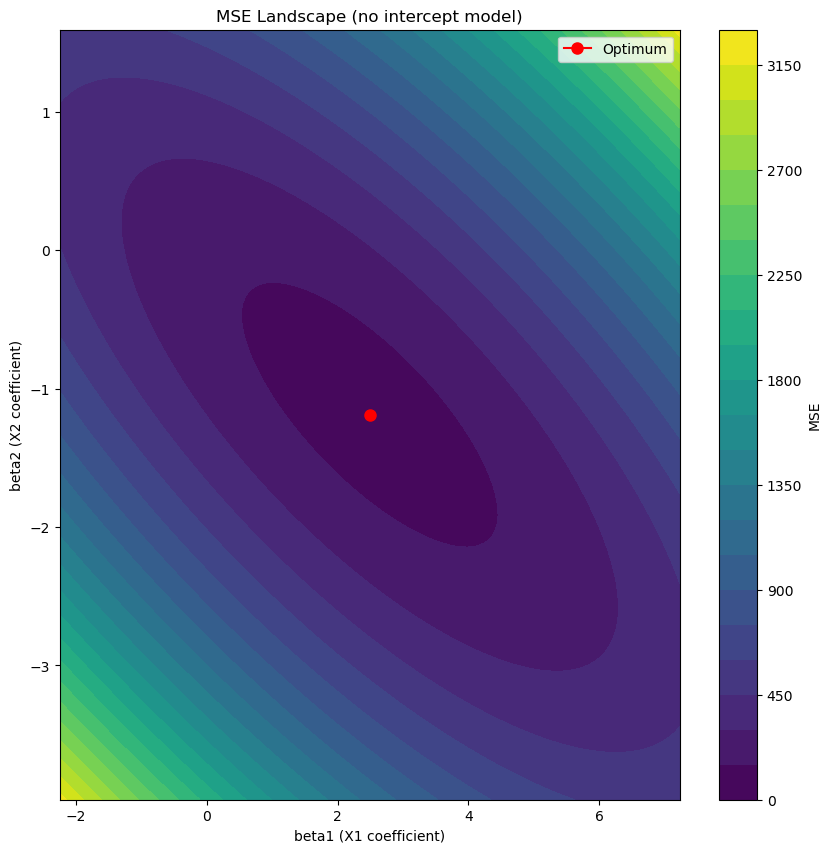

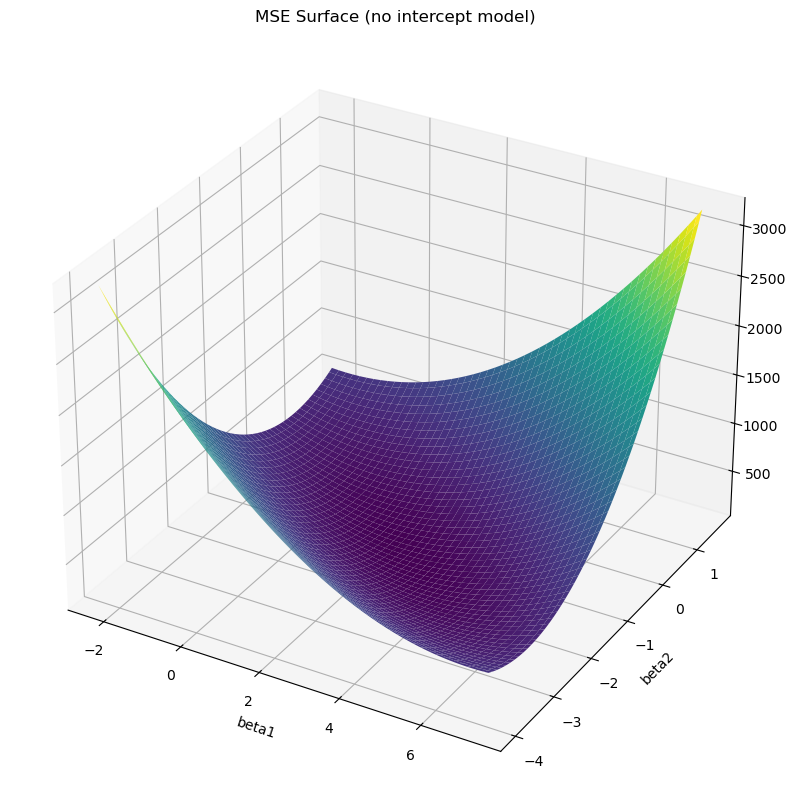

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

X1 = df["X1"].to_numpy()
X2 = df["X2"].to_numpy()
y  = df["y"].to_numpy()

def mse_two_param(beta1, beta2, X1, X2, y):
    y_pred = beta1 * X1 + beta2 * X2
    return np.mean((y - y_pred) ** 2)

X = np.column_stack([X1, X2])
beta_opt, *_ = np.linalg.lstsq(X, y, rcond=None)
b1_opt, b2_opt = beta_opt
mse_opt = mse_two_param(b1_opt, b2_opt, X1, X2, y)

print(f"Optimal betas (no intercept): beta1 = {b1_opt:.6f}, beta2 = {b2_opt:.6f}")
print(f"Optimal MSE: {mse_opt:.6f}")

# ====== Build a grid around the optimum ======
pad1 = max(1.0, abs(b1_opt)*1.5 + 1.0)
pad2 = max(1.0, abs(b2_opt)*1.5 + 1.0)
b1_vals = np.linspace(b1_opt - pad1, b1_opt + pad1, 150)
b2_vals = np.linspace(b2_opt - pad2, b2_opt + pad2, 150)
B1, B2 = np.meshgrid(b1_vals, b2_vals)

# Compute MSE over the grid (vectorized)
Yhat = (B1[..., None] * X1) + (B2[..., None] * X2)
MSE_grid = np.mean((y - Yhat) ** 2, axis=-1)

# ====== Contour plot ======
plt.figure(figsize=(10, 10))
cs = plt.contourf(B1, B2, MSE_grid, levels=30, cmap='viridis')
plt.plot([b1_opt], [b2_opt], marker='o', color='red', markersize=8, label='Optimum')
plt.xlabel("beta1 (X1 coefficient)")
plt.ylabel("beta2 (X2 coefficient)")
plt.title("MSE Landscape (no intercept model)")
plt.colorbar(cs, label="MSE")
plt.legend()
plt.show()

# ====== 3D surface plot ======
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1, B2, MSE_grid, cmap='viridis', linewidth=0, antialiased=True)
ax.set_xlabel("beta1")
ax.set_ylabel("beta2")
#ax.set_zlabel("MSE")
ax.set_title("MSE Surface (no intercept model)")
plt.show()